In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [18]:
x = np.arange(0, 20, 1)
y = x ** 2
df = pd.DataFrame({'X': x, 'Y': y})
df.head()

,X,Y
0,0,0
1,1,1
2,2,4
3,3,9
4,4,16


Text(0, 0.5, 'Y')

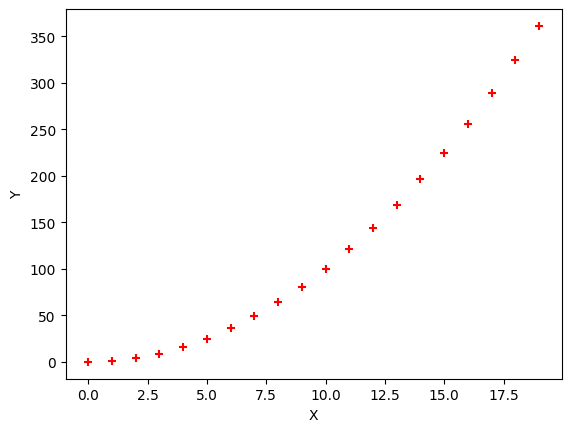

In [19]:
plt.scatter(df.X, df.Y, color="red", marker="+")
plt.xlabel("X")
plt.ylabel("Y")

In [20]:
reg = linear_model.LinearRegression()
reg.fit(df[["X"]], df["Y"])

LinearRegression()

In [21]:
print(reg.coef_)
print(reg.intercept_)

[19.]
-57.00000000000003


Text(0, 0.5, 'Y')

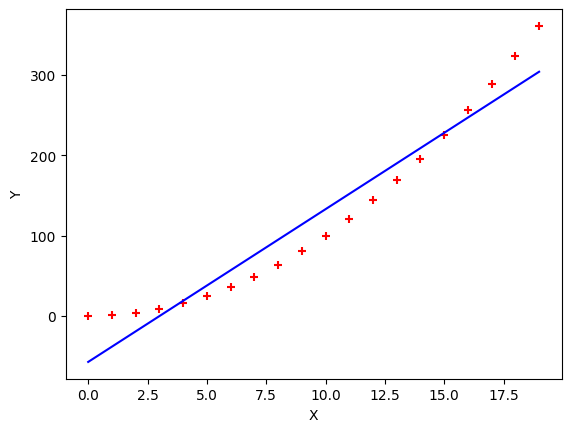

In [22]:
plt.scatter(df.X, df.Y, color="red", marker="+")
plt.plot(df.X, reg.predict(df[["X"]]), color="blue")
plt.xlabel("X")
plt.ylabel("Y")

### Feature Engineering (1)

In [23]:
# Create feature X and reshape it
x = np.arange(0, 20, 1)
X = x ** 2
X = X.reshape(-1, 1)

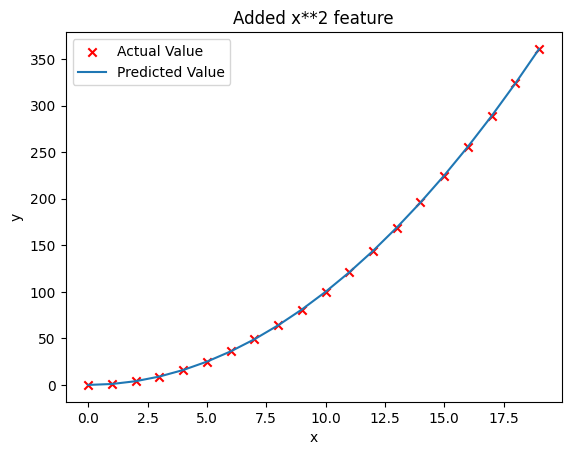

[1.] 0.0


In [24]:
reg = linear_model.LinearRegression()
reg.fit(pd.DataFrame({"X": X.flatten()}), df["Y"])

model_w = reg.coef_
model_b = reg.intercept_

plt.scatter(x, y, marker='x', c='r', label="Actual Value");
plt.title("Added x**2 feature")
plt.plot(x, np.dot(X, model_w) + model_b, label="Predicted Value"); 
plt.xlabel("x"); 
plt.ylabel("y"); 
plt.legend(); 
plt.show()

print(model_w, model_b)

### Feature Engineering (2)

In [25]:
# create target data
x = np.arange(0, 20, 1)
y = x**2

# engineer features
df = pd.DataFrame({"x": x, "x^2": x**2, "x^3": x**3, "y": y})
df.head()


,x,x^2,x^3,y
0,0,0,0,0
1,1,1,1,1
2,2,4,8,4
3,3,9,27,9
4,4,16,64,16


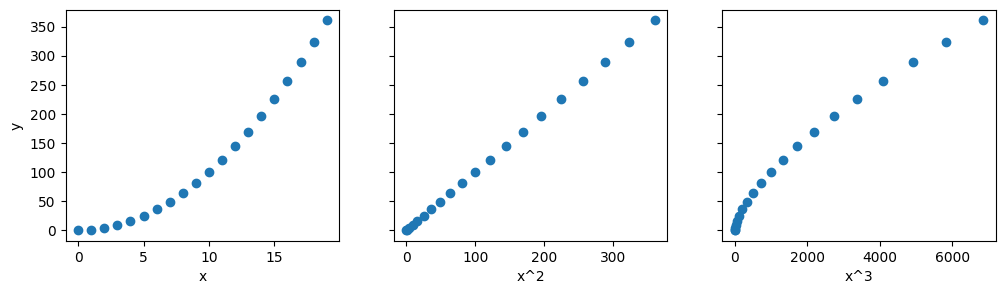

In [26]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for i in range(3):
    ax[i].scatter(df[df.columns[i]], df["y"])  # Access columns by their names
    ax[i].set_xlabel(df.columns[i])
ax[0].set_ylabel("y")
plt.show()


In [27]:
X_train = df.drop(columns="y")
Y_train = df[["y"]]

w: [[-2.6417561e-14  1.0000000e+00 -2.3973675e-15]]
b: [4.30588898e-12]


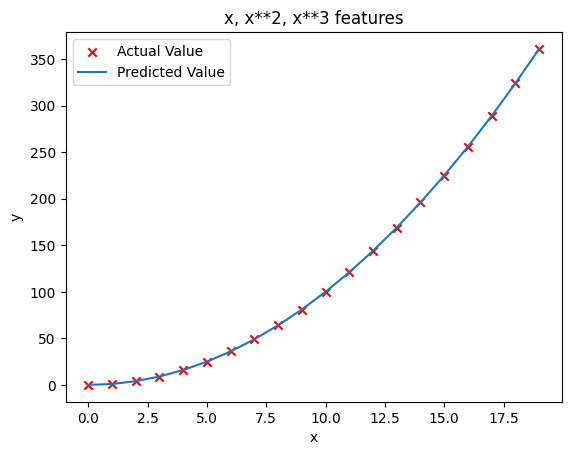

In [28]:
reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)

model_w = reg.coef_
model_b = reg.intercept_

print(f"w: {model_w}\nb: {model_b}")

plt.scatter(x, y, marker='x', c='r', label="Actual Value");
plt.title("x, x**2, x**3 features")
plt.plot(x, np.dot(X_train, model_w.T) + model_b, label="Predicted Value"); 
plt.xlabel("x"); 
plt.ylabel("y"); 
plt.legend(); 
plt.show()


In [29]:
# scaling the features
x_mu = np.mean(X_train, axis=0)
x_sigma = np.std(X_train, axis=0)
x_norm = (X_train - x_mu) / x_sigma

x_norm.head()

,x,x^2,x^3
0,-1.647509,-1.088156,-0.863966
1,-1.474087,-1.079345,-0.863488
2,-1.300665,-1.052912,-0.860137
3,-1.127243,-1.008858,-0.851043
4,-0.953821,-0.947181,-0.833332


w: [[ 3.95260626e-13  1.13494714e+02 -5.78214664e-13]]
b: [123.5]


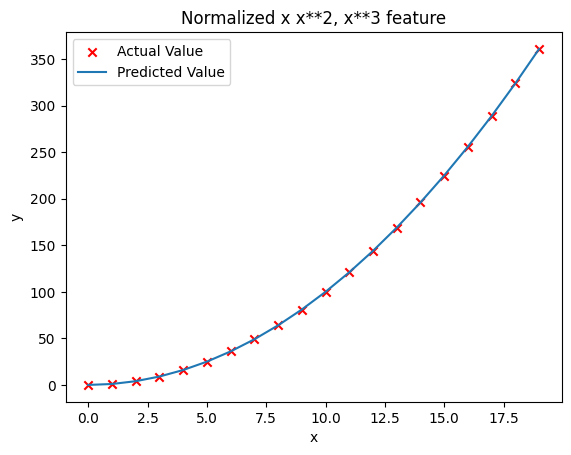

In [30]:
reg = linear_model.LinearRegression()
reg.fit(x_norm, Y_train)

model_w = reg.coef_
model_b = reg.intercept_

print(f"w: {model_w}\nb: {model_b}")

plt.scatter(x, y, marker='x', c='r', label="Actual Value");
plt.title("Normalized x x**2, x**3 feature")
plt.plot(x, np.dot(x_norm, model_w.T) + model_b, label="Predicted Value"); 
plt.xlabel("x"); 
plt.ylabel("y"); 
plt.legend(); 
plt.show()